In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import rasterio

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/odc/accesibilidad-urbana/aup/data.py:24: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(


## Gather proximity data by cluster

In [2]:
area_analysis = 'kmeans_cluster'
walk_speed = 4.5
speed_name = str(walk_speed).replace('.','_')
table = f'santiago_{area_analysis}analysis_{speed_name}_kmh'
schema = 'projects_research'
gdf = aup.gdf_from_db(table, schema)

In [3]:
print(gdf.shape)
gdf.head(2)

(8, 30)


,wellbeing_supplying,wellbeing_caring,wellbeing_living,wellbeing_enjoying,wellbeing_learning,wellbeing_working,wellbeing,environmental_impact_supplying,environmental_impact_caring,environmental_impact_living,...,sociability,cluster,geometry,supplying,caring,living,enjoying,learning,working,hqsl
0,2.423088,1.010563,3.106392,2.063188,3.459282,6.666667,18.72918,7.396381,4.975124,9.038760,...,18.069688,1,"POLYGON ((-70.71713 -33.46996, -70.71725 -33.4...",3.111095,2.367424,4.452346,3.354365,2.132224,3.943085,19.360539
1,4.133103,2.830600,4.772440,4.878378,6.845992,8.016878,31.47739,7.998657,4.939332,8.717789,...,24.835984,2,"POLYGON ((-70.70123 -33.46318, -70.70149 -33.4...",5.066061,3.576347,4.926019,5.615322,4.717854,5.337969,29.239571


<Axes: >

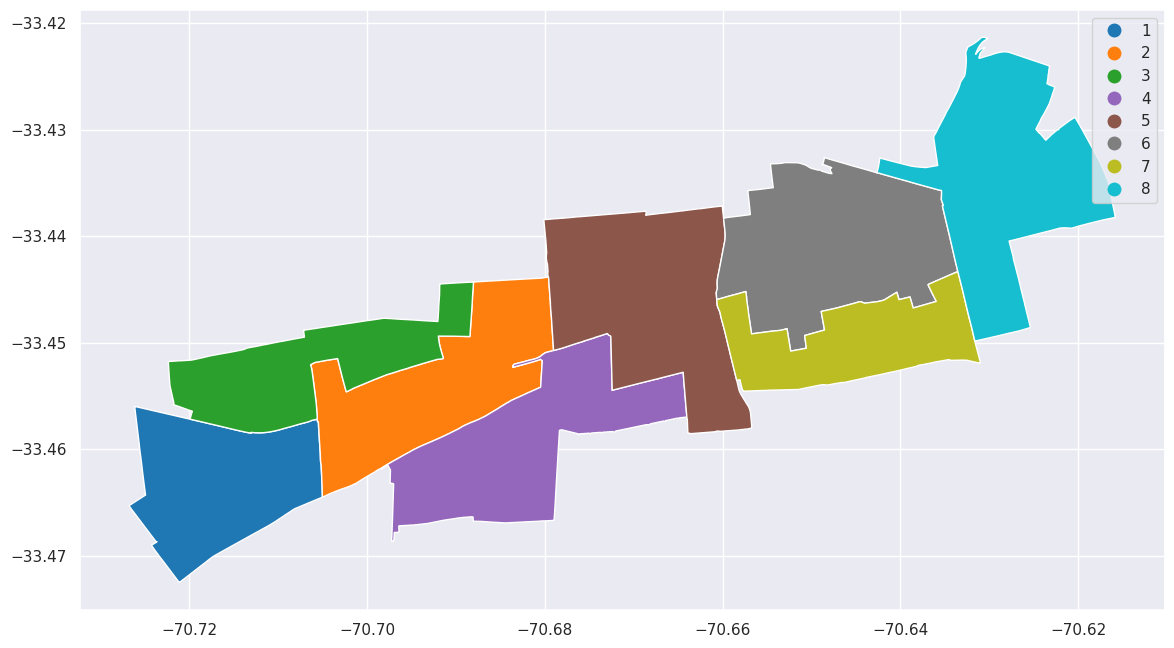

In [42]:
gdf.plot('cluster', categorical=True, legend=True)

## Density data

In [4]:
data_dict = {'cluster':[6,8,5,7,4,3,2,1],
            'density_pob_ha':[227.612759751216,
                             76.36283440877,
                             176.554123856947,
                             462.836261312232,
                             86.6777229415963,
                             133.212952388304,
                             131.323548980312,
                             81.382499010395]}
df = pd.DataFrame.from_dict(data_dict)
df

,cluster,density_pob_ha
0,6,227.612760
1,8,76.362834
2,5,176.554124
3,7,462.836261
4,4,86.677723
5,3,133.212952
6,2,131.323549
7,1,81.382499


In [5]:
gdf = gdf.merge(df, on='cluster')
print(gdf.shape)
gdf.head(2)

(8, 31)


,wellbeing_supplying,wellbeing_caring,wellbeing_living,wellbeing_enjoying,wellbeing_learning,wellbeing_working,wellbeing,environmental_impact_supplying,environmental_impact_caring,environmental_impact_living,...,cluster,geometry,supplying,caring,living,enjoying,learning,working,hqsl,density_pob_ha
0,2.423088,1.010563,3.106392,2.063188,3.459282,6.666667,18.72918,7.396381,4.975124,9.038760,...,1,"POLYGON ((-70.71713 -33.46996, -70.71725 -33.4...",3.111095,2.367424,4.452346,3.354365,2.132224,3.943085,19.360539,81.382499
1,4.133103,2.830600,4.772440,4.878378,6.845992,8.016878,31.47739,7.998657,4.939332,8.717789,...,2,"POLYGON ((-70.70123 -33.46318, -70.70149 -33.4...",5.066061,3.576347,4.926019,5.615322,4.717854,5.337969,29.239571,131.323549


## Socioeconomic data

In [6]:
# Load data
data_dir = '../../../data/processed/santiago/nivel_socioeconomico/'
socioeconomico_urbano = gpd.read_file(data_dir + 'BAS_ismt_urbano_2022.shp')

# Set CRS
try:
    socioeconomico_urbano = socioeconomico_urbano.set_crs("EPSG:4326")
except:
    socioeconomico_urbano = socioeconomico_urbano.to_crs("EPSG:4326")
    
# Show
print(socioeconomico_urbano.shape)
socioeconomico_urbano.head(1)

(1863, 46)


,objectid,cod_region,nom_region,cod_provin,nom_provin,cod_comuna,nom_comuna,geocodigo,urbano,distrito,...,alleg,escolar,mat_acept,mat_recup,mat_irrec,ind_mat,poblacion,st_area_sh,st_length_,geometry
0,1,13,Metropolitana de Santiago,131,Santiago,13101,Santiago,13101011001,SANTIAGO,1,...,196.0,15.93956,1091.0,1.0,0.0,8.999084,2174,209145.642793,2200.895816,"POLYGON ((-70.64101 -33.43757, -70.64103 -33.4..."


In [7]:
cnt_data = socioeconomico_urbano.to_crs("EPSG:32719").centroid.reset_index().rename(columns={'index':'fid',
                                                                                            0:'geometry'})
cnt_data = cnt_data.set_geometry("geometry")
cnt_data = cnt_data.set_crs("EPSG:32719")
cnt_data = cnt_data.to_crs("EPSG:4326")



In [8]:
socioeconomico_urbano = cnt_data.merge(socioeconomico_urbano.reset_index().rename(columns={'index':'fid'}).drop(columns='geometry'),
                                       on='fid')

<Axes: >

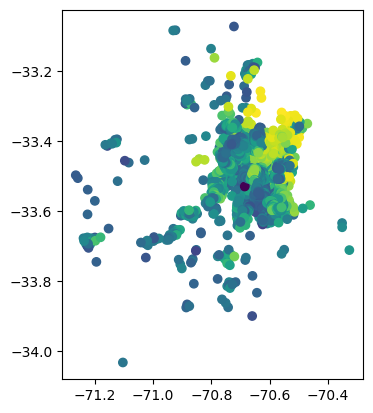

In [9]:
socioeconomico_urbano.plot('ismtpn')

In [10]:
socioeconomico_urbano = socioeconomico_urbano[['geocodigo','ismtpn','poblacion','geometry']]

#### Additional socioeconomic data

In [33]:
grl_dir = "../../../data/processed/santiago/"
census_tract = gpd.read_file(grl_dir + f'santiago_zonascensalesanalysis_{speed_name}_kmh.geojson') 
print(census_tract.shape)
census_tract.head(2)

(1639, 38)


,geocodigo,gse_dom,gse_prom,ismtpn,dens_pobha,GEOCODI,prc_hg_,prc_cn_,prc_dmy,pr_JHES,...,wellbeing_working,wellbeing,supplying,caring,living,enjoying,learning,working,hqsl,geometry
0,13101011001,C1,C2,0.769388,103.946703,13101011001,0.763760,0.107536,0.133785,0.799323,...,5.196116,42.738248,7.581116,6.336907,5.599436,9.128404,4.462990,6.738089,39.846943,"POLYGON ((-70.64101 -33.43757, -70.64103 -33.4..."
1,13101011002,C1,C2,0.750089,226.888923,13101011002,0.827209,0.100078,0.076622,0.802971,...,5.074883,42.941134,8.236338,5.876095,6.304201,8.877243,4.428038,6.741553,40.463468,"POLYGON ((-70.64645 -33.43683, -70.64718 -33.4..."


In [12]:
census_tract = census_tract[['geocodigo','prc_hg_',
                  'prc_cn_','prc_dmy','pr_JHES','prc_OcA']]

In [14]:
socioeconomico_urbano = socioeconomico_urbano.merge(census_tract, on='geocodigo')
print(socioeconomico_urbano.shape)
socioeconomico_urbano.head(2)

(1639, 9)


,geocodigo,ismtpn,poblacion,geometry,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA
0,13101011001,0.769388,2174,POINT (-70.64222 -33.43592),0.763760,0.107536,0.133785,0.799323,0.828112
1,13101011002,0.750089,2282,POINT (-70.64635 -33.43494),0.827209,0.100078,0.076622,0.802971,0.795152


## Join data

Preprocessing

In [15]:
socioeconomico_urbano = socioeconomico_urbano.sjoin(gdf[['cluster','geometry']])
print(socioeconomico_urbano.shape)
socioeconomico_urbano.head(4)

(126, 11)


,geocodigo,ismtpn,poblacion,geometry,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA,index_right,cluster
0,13101011001,0.769388,2174,POINT (-70.64222 -33.43592),0.763760,0.107536,0.133785,0.799323,0.828112,5,6
1,13101011002,0.750089,2282,POINT (-70.64635 -33.43494),0.827209,0.100078,0.076622,0.802971,0.795152,5,6
2,13101011003,0.763195,2209,POINT (-70.63881 -33.43759),0.819686,0.097561,0.090592,0.808362,0.870209,5,6
3,13101011004,0.745123,1821,POINT (-70.64444 -33.44018),0.797414,0.118534,0.092672,0.773707,0.750000,5,6


In [16]:
# Generalized function to calculate weighted average for multiple value columns
def weighted_average(group, value_columns, weight_column):
    weighted_averages = {}
    for col in value_columns:
        weighted_averages[col] = (group[col] * group[weight_column]).sum() / group[weight_column].sum()
    return pd.Series(weighted_averages)

In [17]:
value_columns = ['ismtpn','prc_hg_','prc_cn_',
                 'prc_dmy','pr_JHES','prc_OcA']  # list of columns to calculate the weighted average for
weight_column = 'poblacion'  # column containing the weights

In [18]:
weighted_avg_df = socioeconomico_urbano.groupby('cluster').apply(
    weighted_average, value_columns=value_columns, 
    weight_column=weight_column).reset_index()

/tmp/ipykernel_1299517/1031797773.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_df = socioeconomico_urbano.groupby('cluster').apply(


In [19]:
weighted_avg_df

,cluster,ismtpn,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA
0,1,0.631833,0.493470,0.407411,0.099619,0.480780,0.743656
1,2,0.631926,0.660042,0.281648,0.061383,0.486174,0.578437
2,3,0.544044,0.500920,0.381328,0.118161,0.269580,0.529288
3,4,0.561064,0.599485,0.331078,0.073802,0.289898,0.428712
4,5,0.677200,0.681327,0.244677,0.078720,0.596731,0.627783
5,6,0.729268,0.782282,0.147981,0.072494,0.740546,0.734774
6,7,0.737417,0.785168,0.179755,0.035498,0.777109,0.744179
7,8,0.752814,0.695425,0.199965,0.112432,0.786634,0.849231


Merge with cluster polygons

In [20]:
cluster_gdf = gdf.merge(weighted_avg_df, on='cluster')
print(cluster_gdf.shape)
cluster_gdf.head(4)

(8, 37)


,wellbeing_supplying,wellbeing_caring,wellbeing_living,wellbeing_enjoying,wellbeing_learning,wellbeing_working,wellbeing,environmental_impact_supplying,environmental_impact_caring,environmental_impact_living,...,learning,working,hqsl,density_pob_ha,ismtpn,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA
0,2.423088,1.010563,3.106392,2.063188,3.459282,6.666667,18.729180,7.396381,4.975124,9.038760,...,2.132224,3.943085,19.360539,81.382499,0.631833,0.493470,0.407411,0.099619,0.480780,0.743656
1,4.133103,2.830600,4.772440,4.878378,6.845992,8.016878,31.477390,7.998657,4.939332,8.717789,...,4.717854,5.337969,29.239571,131.323549,0.631926,0.660042,0.281648,0.061383,0.486174,0.578437
2,2.190328,1.665367,3.076833,1.583748,5.202678,6.682267,20.401221,9.154966,5.414220,10.000000,...,3.512018,3.883490,21.965154,133.212952,0.544044,0.500920,0.381328,0.118161,0.269580,0.529288
3,4.133898,1.882057,3.686303,4.767434,7.127884,7.457045,29.054621,5.493373,4.014684,7.788039,...,4.700608,5.547942,27.168640,86.677723,0.561064,0.599485,0.331078,0.073802,0.289898,0.428712


## Analysis

In [22]:
col_analysis = ['ismtpn','density_pob_ha','prc_hg_',
                  'prc_cn_','prc_dmy','pr_JHES','prc_OcA',
                  'sociability','wellbeing','environmental_impact',
                  'supplying','caring','living',
                  'enjoying','working','learning',
                  'hqsl']
cluster_gdf = cluster_gdf[col_analysis]
print(cluster_gdf.shape)
cluster_gdf.head(4)

(8, 17)


,ismtpn,density_pob_ha,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA,sociability,wellbeing,environmental_impact,supplying,caring,living,enjoying,working,learning,hqsl
0,0.631833,81.382499,0.493470,0.407411,0.099619,0.480780,0.743656,18.069688,18.729180,29.938432,3.111095,2.367424,4.452346,3.354365,3.943085,2.132224,19.360539
1,0.631926,131.323549,0.660042,0.281648,0.061383,0.486174,0.578437,24.835984,31.477390,30.849296,5.066061,3.576347,4.926019,5.615322,5.337969,4.717854,29.239571
2,0.544044,133.212952,0.500920,0.381328,0.118161,0.269580,0.529288,22.594289,20.401221,31.151024,3.881016,2.864636,4.747441,3.076553,3.883490,3.512018,21.965154
3,0.561064,86.677723,0.599485,0.331078,0.073802,0.289898,0.428712,24.419781,29.054621,26.966567,4.921589,2.756692,4.140937,5.100871,5.547942,4.700608,27.168640


In [23]:
import seaborn as sns

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaled_cluster = scaler.fit_transform(cluster_gdf)

<Axes: >

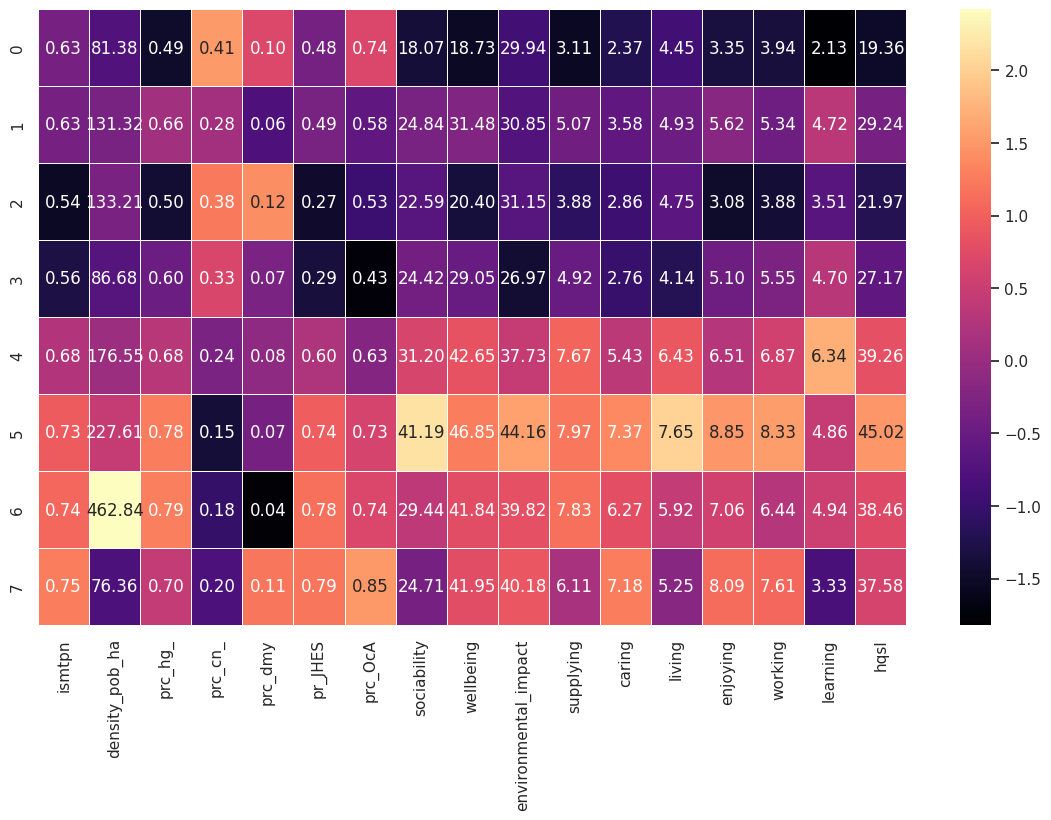

In [31]:
sns.heatmap(scaled_cluster, annot=cluster_gdf, 
            xticklabels=cluster_gdf.columns,
           fmt=".2f", linewidth=.5, cmap="magma")

In [36]:
census_tract[['gse_prom','ismtpn']].groupby('gse_prom').agg(['min','max','mean'])

ismtpn                    
               min       max      mean
gse_prom                              
C1        0.772222  0.829380  0.788628
C2        0.674001  0.771948  0.732291
C3        0.589637  0.673602  0.626929
D         0.363799  0.589517  0.498901
E         0.254768  0.254768  0.254768

In [39]:
cluster_gdf.mean()

ismtpn                    0.658196
density_pob_ha          171.995338
prc_hg_                   0.649765
prc_cn_                   0.271730
prc_dmy                   0.081514
pr_JHES                   0.553431
prc_OcA                   0.654508
sociability              27.057197
wellbeing                34.118563
environmental_impact     35.098676
supplying                 5.820572
caring                    4.726386
living                    5.440140
enjoying                  5.957577
working                   5.995956
learning                  4.316206
hqsl                     32.256837
dtype: float64